# Computational Methods in Economics

## Problem Set 5 - Multivariate Function Approximation 

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2018-01-15 13:36:06.045318


### Preliminaries

#### Import Modules

In [2]:
import numpy as np
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import funapprox_cme as fa

**Note**: The last command imports the **funapprox_cme** module, which contains the functions defined in the last lecture. The Python-file **funapprox_cme.py** which can be downloaded from LSF must be saved in the same folder as this notebook.

## Question 1 (N)

In the lecture, we have approximated the Cobb-Douglas production function with two arguments using a tensor product Chebyshev basis. Repeat this exercise with a complete set of Chebyshev polynomials. Try different values for the total degree $l$ and plot the approximation errors.

**Hint**: You can implement the regression step with the function **chebapprox_2d** that was defined in the lecture, by adding a single line!

## Question 2 (N)

In the last problem set, we have approximated the value function resulting from the neoclassical growth model. Here, we repeat this exercise for a modified version of the model that has two *state variables*, i.e. the value function is a function of two variables. 

The per-period utility function is the same as before. The production function has three inputs, *two* capital stocks, denoted by $k$ and $q$, and labor. Let's assume the following functional form:
\begin{equation}
    f(k, q, h) = A \left[ (\omega k^{\frac{\sigma - 1}{\sigma}} + (1 - \omega) q^{\frac{\sigma - 1}{\sigma}})^{\frac{\sigma}{\sigma-1}}   \right]^\alpha h^{1-\alpha}
\end{equation}

As before, we have a Cobb-Douglas production function. The first argument is a *CES composite* of the two capital stocks, $k$ and $q$. Recall that a CES function allows you to set an *elasticity of substitution* $\sigma \in [0, \infty)$ different from 1 (which would be the Cobb-Douglas case). For $\sigma < 1$, the two inputs are considered *complements*, while for $\sigma > 1$, they are *substitutes*.

The resource constraint now reads:

\begin{equation}
    k_{t+1} + q_{t+1} + c_t = f(k_t, q_t, h_t) + (1 - \delta) (k_t + q_t)
\end{equation}

where we have assumed that both types of capital depreciate with the same rate $\delta$. 

The planner's problem is identical to before, with the exception that we consider a *finite* time horizon:

\begin{equation}
    \max_{\left\{c_t, k_{t+1}, q_{t+1}, h_t\right\}} \sum^T_{t = 0} \beta^t u(c_t, h_t) 
\end{equation}

s.t. the resource constraint.

As before, we want to approximate the initial *value function* $V$, which now depends on both $k_0$ and $q_0$:

\begin{equation}
    V(k_0, q_0) = \sum^T_{t = 0} \beta^t u[f(k^*_t, q^*_t, h^*_t) + (1 - \delta) (k^*_t + q^*_t) - k^*_{t+1} - q^*_{t+1}, h^*_t] 
\end{equation}

where $(k^*_t, q^*_t, h^*_t)_{t = 0}^T$ denote the optimal sequences for the capital stocks and labor. 

To find $V$, follow the same steps as before:

(i) Set $T = 2$. Create grids for the initial capital stocks $k_0$ and $q_0$, each consisting of $m$ nodes. Solve the model above for each of the resulting $m^2$ grid points. Store the resulting values $V_{i_1 i_2} = V(k_{0, i_1}, q_{0, i_2})$ in a Numpy array.

(ii) Using the data $\{V_{i_1 i_2}, k_{0, i_1}, q_{0, i_2}\}_{i = 1}^m$, approximate the function $V$. Choose a suitable number of grid points and basis functions. Compare the approximated values for $(k_0, q_0) = (0.66, 0.75)$ with the true value. 


In [3]:
## utility
beta = 0.8      # discount factor
nu = 2       # risk-aversion coefficient for consumption
eta = 1         # elasticity parameter for labor supply
eps = 1e-6      # lower bound of consumption and labor supply
## production
alpha = 0.25
delta = 0.1
## derived
A = (1 - beta * (1 - delta))/(alpha*beta) # normalization parameter for production function => steady state k = 1
B = (1 - alpha) * A * (A - delta)**(-nu)      # parameter for utility function

omega = 0.5
sigma = 0.8

## Question 3 (N)

The simplest approach to approximating a univariate function $f$ is (piecewise) linear interpolation. As before, define a grid $x_1, ..., x_m$ and compute the function values $f(x_1), ... , f(x_m)$. Then, to approximate $f(x)$, find the two grid points $x_i$ and $x_{i+1}$ that bracket $x$, i.e. such that $x_l \equiv x_i \le x \le x_{i + 1} \equiv x_r $. The interpolant is given by:

\begin{equation}
    \hat{f}(x)=f(x_{l})+{\frac {f(x_{r})-f(x_{l})}{x_{r}-x_{l}}}(x-x_{l})
\end{equation}

(a) Write a function **lin_int** that takes three arguments - a scalar **x** at which to approximate the function, an array **X** consisting of $m$ grid points and an array **Y** containing the function values corresponding to the grid - and that implements this interpolation scheme. Use this function to approximate the sine function $f(x) = \sin(x)$ between 0 and $2\pi$. Compare your result to Numpy's **interp** function. Plot both the approximated and the true function values.

**Hint**: The slightly tricky part here is to find $x_l$ and $x_r$. There are different ways to achieve this; one possibility is Numpy's **argwhere** function. You may want to combine this with a **try/except** statement.

(b) Compute the maximum interpolation error when using linear interpolation on a dense grid between 0 and $2\pi$. Compare this to using Chebyshev interpolation. 

## Question 4 (N)

This question illustrates the use of interpolation for given grid points. Suppose you have information on some climate indicator, for example the number of hours of sunshine per year, for a finite set of locations, here indexed by latitude and longitude:

Stockholm - 1821 - (59.329444, 18.068611)

Copenhagen - 1539 - (55.676111, 12.568333)

Berlin - 1626 - (52.516667, 13.388889)

Vienna - 1884 - (48.2, 16.366667)

Zagreb - 1913 - (45.816667, 15.983333)

Rome - 2473 - (41.9, 12.5)

The first value gives the annual amount of sunshine, taken from https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration; the tuple contains the latitude and longitude of the corresponding city. This data is captured by the following Numpy array:

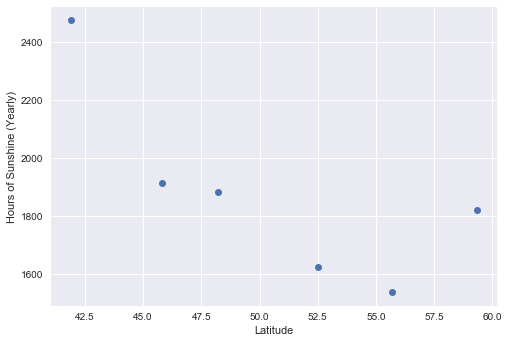

In [8]:
D = np.array([[59.329444, 18.068611, 1821],
              [55.676111, 12.568333, 1539],
              [52.516667, 13.388889, 1626],
              [48.2, 16.366667, 1884],
              [45.816667, 15.983333, 1913],
              [41.9, 12.5, 2473]])

fig, ax = plt.subplots()
ax.plot(D[:,0], D[:,2], 'o')
ax.set_ylabel('Hours of Sunshine (Yearly)')
ax.set_xlabel('Latitude')

(a) Use this data to find a (univariate) function $\hat{f}$ that maps hours of sunshine per year to latitude. We can use this function to predict annual sunshine duration for cities that are not contained in the sample. For example, Prague is represented by the following data:

In [9]:
prague = np.array([50.083333, 14.416667, 1668])

Does $\hat{f}$  over- or underpredict the amount of sunshine in Prague?

(b) Suppose we also include longitude as an explanatory variable in $\hat{f}$. Does this increase or decrease the interpolation error for yearly sunshine duration in Prague? 